In [56]:
import pandas as pd

In [57]:
df = pd.read_csv('Camp_Market.csv', sep=';')

In [58]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


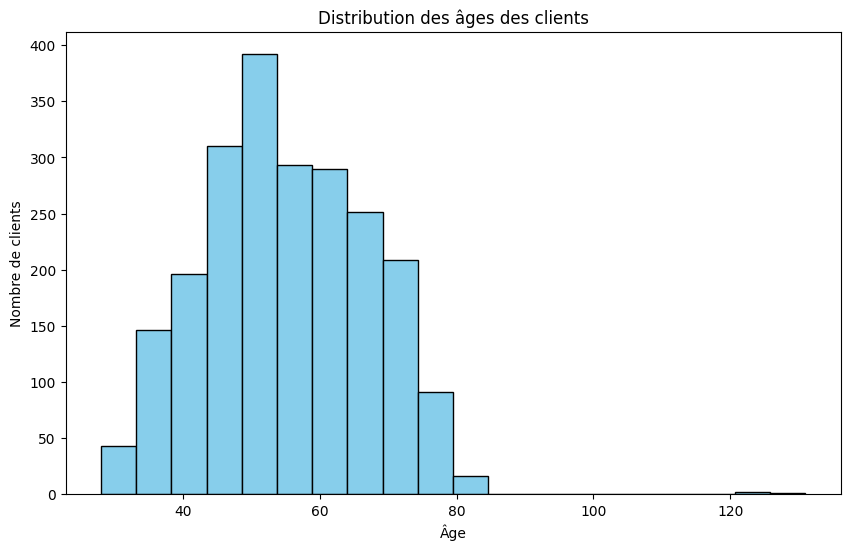

In [68]:
import matplotlib.pyplot as plt

# Calculer l'âge des clients
df['Age'] = 2024 - df['Year_Birth']

# Créer un histogramme de la distribution des âges
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des âges des clients')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

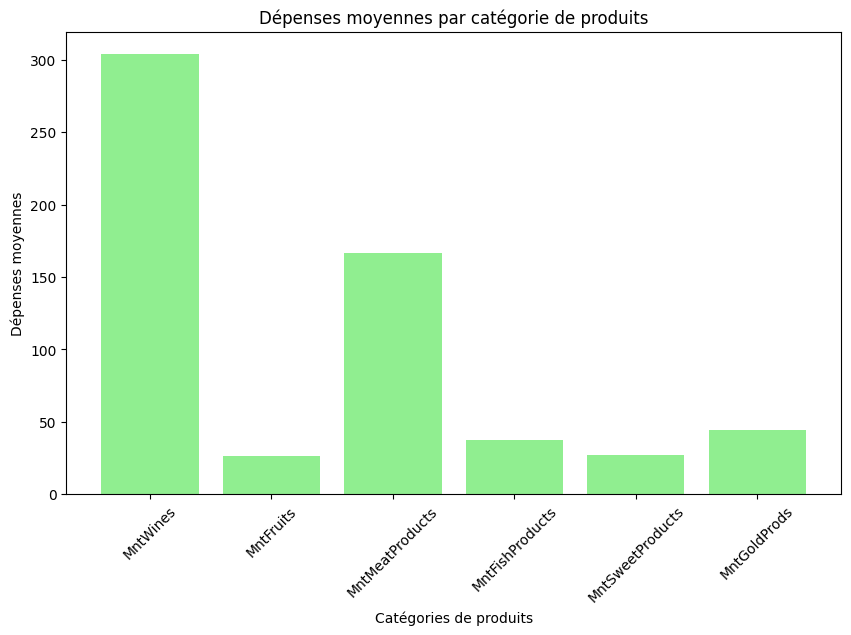

In [60]:
# Dépenses moyennes dans chaque catégorie de produits
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
moyennes = df[categories].mean()

# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(categories, moyennes, color='lightgreen')
plt.title('Dépenses moyennes par catégorie de produits')
plt.xlabel('Catégories de produits')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=45)
plt.show()

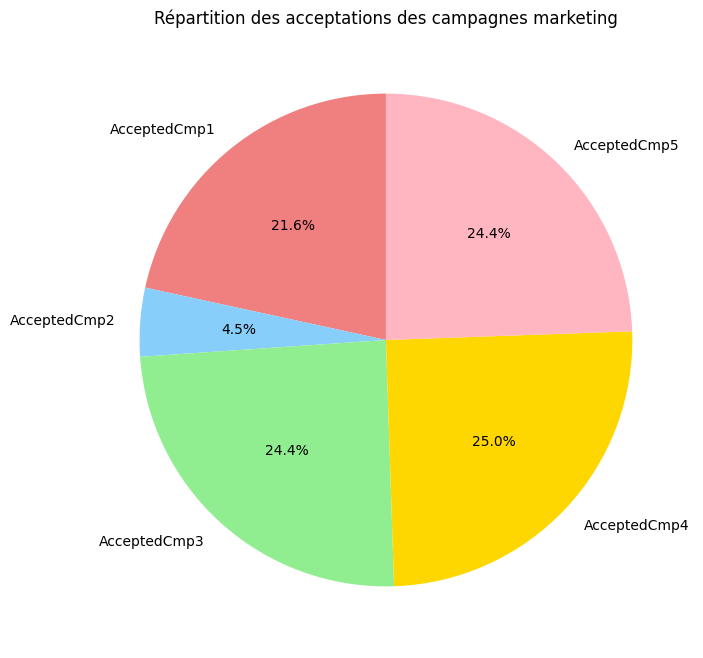

In [61]:
# Somme des clients ayant accepté chaque campagne
campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptations = df[campagnes].sum()

# Créer un graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(acceptations, labels=campagnes, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Répartition des acceptations des campagnes marketing')
plt.show()

                MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Has_Children                                                            
Avec enfants  230.908240  15.925718        85.045568        21.985019   
Sans enfants  487.305643  52.357367       372.609718        76.547022   

              MntSweetProducts  MntGoldProds  
Has_Children                                  
Avec enfants         16.709114     36.006242  
Sans enfants         53.061129     64.148903  


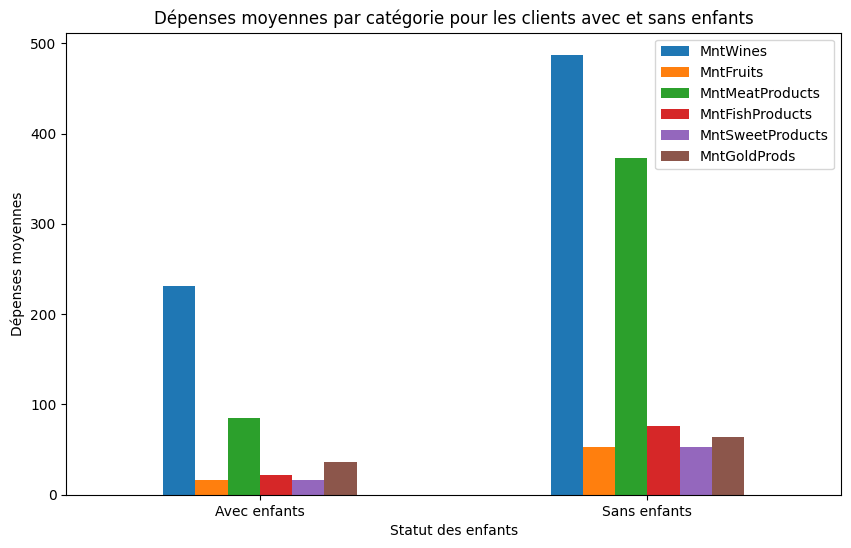

In [62]:
# Créer une nouvelle colonne pour indiquer si le client a des enfants
df['Has_Children'] = df['Kidhome'] + df['Teenhome']
df['Has_Children'] = df['Has_Children'].apply(lambda x: 'Avec enfants' if x > 0 else 'Sans enfants')

# Comparer les dépenses moyennes pour ceux avec et sans enfants
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

depenses_moyennes = df.groupby('Has_Children')[categories].mean()

# Afficher les résultats
print(depenses_moyennes)

# Visualiser les résultats avec un diagramme en barres
depenses_moyennes.plot(kind='bar', figsize=(10, 6))
plt.title('Dépenses moyennes par catégorie pour les clients avec et sans enfants')
plt.xlabel('Statut des enfants')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

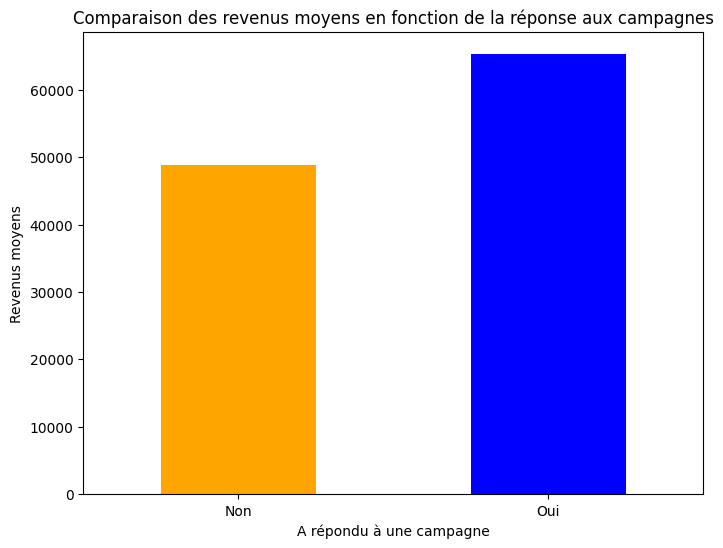

In [64]:
# Créer une colonne binaire indiquant si le client a répondu à une campagne (au moins une acceptée)
df['Has_Responded'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

# Comparer les revenus moyens entre ceux qui ont répondu et ceux qui n'ont pas répondu
revenus_moyens = df.groupby('Has_Responded')['Income'].mean()

# Visualiser avec un diagramme en barres
plt.figure(figsize=(8, 6))
revenus_moyens.plot(kind='bar', color=['orange', 'blue'])
plt.title('Comparaison des revenus moyens en fonction de la réponse aux campagnes')
plt.xlabel('A répondu à une campagne')
plt.ylabel('Revenus moyens')
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)
plt.show()


In [65]:
# Calculer les dépenses totales pour chaque client
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


Il est important d'attendre d'avoir des cluster ici et de supp les donéee abérante pour un better scatter plot

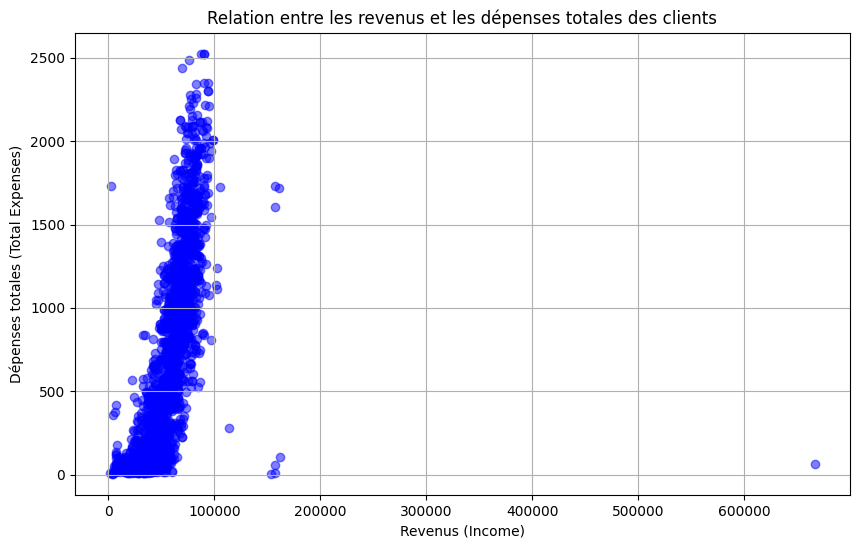

In [66]:
import matplotlib.pyplot as plt

# Créer un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Total_Expenses'], alpha=0.5, color='blue')
plt.title('Relation entre les revenus et les dépenses totales des clients')
plt.xlabel('Revenus (Income)')
plt.ylabel('Dépenses totales (Total Expenses)')
plt.grid(True)
plt.show()
